In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [1]:
import numpy as np
import time

# 매개변수 설정
nx = ny = 101  # x 및 y 방향의 그리드 점 수
Lx = Ly = 1.0  # x 및 y 방향의 영역 크기
dx = Lx / (nx - 1)  # x 방향 그리드 간격
dy = Ly / (ny - 1)  # y 방향 그리드 간격
x = np.linspace(0, Lx, nx)  # x 방향의 그리드 점
y = np.linspace(0, Ly, ny)  # y 방향의 그리드 점
f = np.sin(np.pi * x[:, np.newaxis]) * np.sin(np.pi * y)  # 소스 항

# 초기 추정값
u0 = np.zeros((nx, ny))

# 경계 조건
u0[0, :] = u0[-1, :] = u0[:, 0] = u0[:, -1] = 0.0

# Jacobi 방법
def jacobi(u, f, dx, dy):
    u_new = np.empty_like(u)
    u_new[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] - dx**2 * f[1:-1, 1:-1])
    return u_new

# Gauss-Seidel 방법
def gauss_seidel(u, f, dx, dy):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - dx**2 * f[i, j])
    return u

# SOR(Successive Over-Relaxation) 방법
def sor(u, f, dx, dy, omega):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - dx**2 * f[i, j])
    return u

# Jacobi 방법으로 해결
def solve_jacobi(u0, f, dx, dy, tol=1e-6, max_iter=1000):
    u = u0.copy()
    it = 0
    residual = tol + 1
    start_time = time.time()
    
    while residual > tol and it < max_iter:
        u_new = jacobi(u, f, dx, dy)
        residual = np.linalg.norm(u_new - u)
        u = u_new
        it += 1
    
    end_time = time.time()
    computation_time = end_time - start_time
    
    return u, it, residual, computation_time

# Gauss-Seidel 방법으로 해결
def solve_gauss_seidel(u0, f, dx, dy, tol=1e-6, max_iter=1000):
    u = u0.copy()
    it = 0
    residual = tol + 1
    start_time = time.time()
    
    while residual > tol and it < max_iter:
        u = gauss_seidel(u, f, dx, dy)
        residual = np.linalg.norm(u - u0)
        it += 1
    
    end_time = time.time()
    computation_time = end_time - start_time
    
    return u, it, residual, computation_time

# SOR 방법으로 해결
def solve_sor(u0, f, dx, dy, omega, tol=1e-6, max_iter=1000):
    u = u0.copy()
    it = 0
    residual = tol + 1
    start_time = time.time()
    
    while residual > tol and it < max_iter:
        u = sor(u, f, dx, dy, omega)
        residual = np.linalg.norm(u - u0)
        it += 1
    
    end_time = time.time()
    computation_time = end_time - start_time
    
    return u, it, residual, computation_time

# Jacobi 방법으로 해결
u_jacobi, it_jacobi, residual_jacobi, time_jacobi = solve_jacobi(u0, f, dx, dy)

# Gauss-Seidel 방법으로 해결
u_gauss_seidel, it_gauss_seidel, residual_gauss_seidel, time_gauss_seidel = solve_gauss_seidel(u0, f, dx, dy)

# SOR 방법으로 해결
omega = 1.5  # SOR의 완화 매개변수
u_sor, it_sor, residual_sor, time_sor = solve_sor(u0, f, dx, dy, omega)

# 결과 출력
print("Jacobi 방법:")
print("반복 횟수:", it_jacobi)
print("잔차:", residual_jacobi)
print("계산 시간:", time_jacobi)

print("\nGauss-Seidel 방법:")
print("반복 횟수:", it_gauss_seidel)
print("잔차:", residual_gauss_seidel)
print("계산 시간:", time_gauss_seidel)

print("\nSOR 방법:")
print("반복 횟수:", it_sor)
print("잔차:", residual_sor)
print("계산 시간:", time_sor)



Jacobi 방법:
반복 횟수: 1000
잔차: inf
계산 시간: 0.11225080490112305

Gauss-Seidel 방법:
반복 횟수: 1000
잔차: 1.5889620681301126
계산 시간: 27.316099166870117

SOR 방법:
반복 횟수: 1000
잔차: 2.4024465066050786
계산 시간: 35.71165895462036


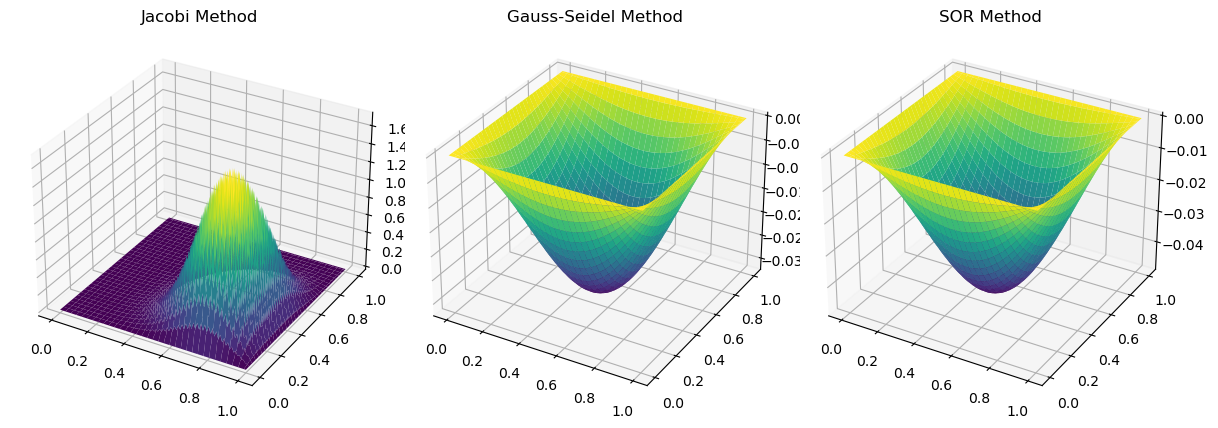

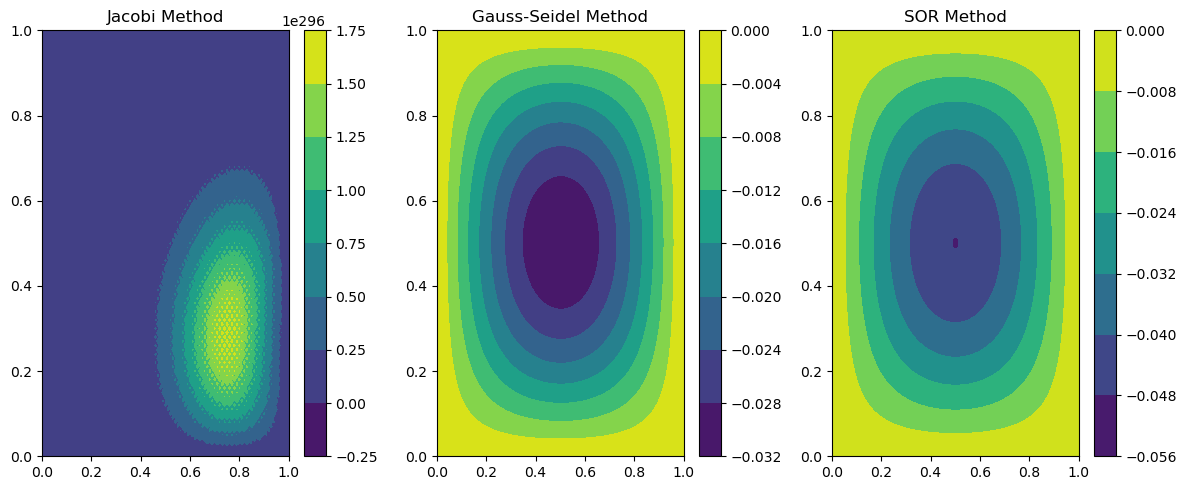

In [3]:
# Create meshgrid for 3D plot
X, Y = np.meshgrid(x, y)

# Plot 3D surface
fig = plt.figure(figsize=(12, 5))

# Jacobi method
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, u_jacobi, cmap='viridis')
ax1.set_title('Jacobi Method')

# Gauss-Seidel method
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, u_gauss_seidel, cmap='viridis')
ax2.set_title('Gauss-Seidel Method')

# SOR method
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, u_sor, cmap='viridis')
ax3.set_title('SOR Method')

plt.tight_layout()
plt.show()

# Plot contour
plt.figure(figsize=(12, 5))

# Jacobi method
plt.subplot(1, 3, 1)
plt.contourf(X, Y, u_jacobi, cmap='viridis')
plt.colorbar()
plt.title('Jacobi Method')

# Gauss-Seidel method
plt.subplot(1, 3, 2)
plt.contourf(X, Y, u_gauss_seidel, cmap='viridis')
plt.colorbar()
plt.title('Gauss-Seidel Method')

# SOR method
plt.subplot(1, 3, 3)
plt.contourf(X, Y, u_sor, cmap='viridis')
plt.colorbar()
plt.title('SOR Method')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 코드를 삽입할 위치에 앞서 작성한 함수 및 변수들을 추가해주세요.

# Solve using Jacobi method
u_jacobi, _, _, _ = solve_jacobi(u0, f, dx, dy)

# Solve using Gauss-Seidel method
u_gauss_seidel, _, _, _ = solve_gauss_seidel(u0, f, dx, dy)

# Solve using SOR method
u_sor, _, _, _ = solve_sor(u0, f, dx, dy, omega)

# Create meshgrid for 3D plot
X, Y = np.meshgrid(x, y)

# Plot 3D surface
fig = plt.figure(figsize=(12, 5))

# Jacobi method
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, u_jacobi, cmap='viridis')
ax1.set_title('Jacobi Method')

# Gauss-Seidel method
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, u_gauss_seidel, cmap='viridis')
ax2.set_title('Gauss-Seidel Method')

# SOR method
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, u_sor, cmap='viridis')
ax3.set_title('SOR Method')

plt.tight_layout()
plt.show()

# Plot contour
plt.figure(figsize=(12, 5))

# Jacobi method
plt.subplot(1, 3, 1)
plt.contourf(X, Y, u_jacobi, cmap='viridis')
plt.colorbar()
plt.title('Jacobi Method')

# Gauss-Seidel method
plt.subplot(1, 3, 2)
plt.contourf(X, Y, u_gauss_seidel, cmap='viridis')
plt.colorbar()
plt.title('Gauss-Seidel Method')

# SOR method
plt.subplot(1, 3, 3)
plt.contourf(X, Y, u_sor, cmap='viridis')
plt.colorbar()
plt.title('SOR Method')

plt.tight_layout()
plt.show()
